# Physique: Autour de l'Effet Doppler
## Correction de l'exercice 2

Ce document comporte des blocks de code Python

On rappelle le profil du signal temporel $s(t)$ ainsi que son spectre de fourier :

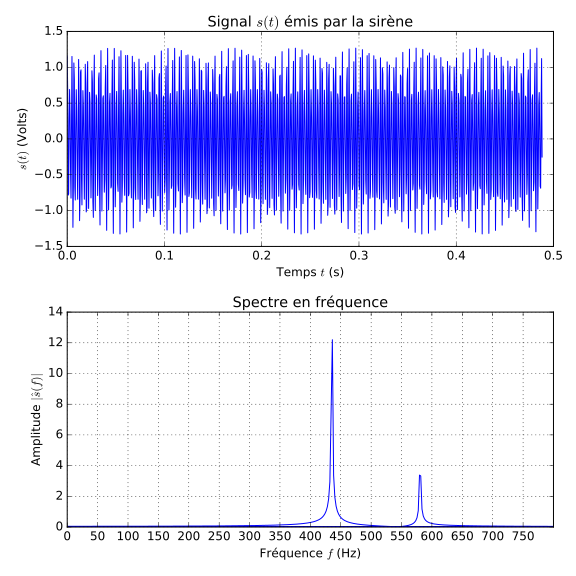

In [19]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as idisp

idisp.SVG("sirene.svg")

Le signal $s(t)$ contient donc deux fréquences principales
$$
f_1 = 435\,\mathrm{Hz}\quad\text{et}\quad f_2 = 580\,\mathrm{Hz}.
$$

La vitesse du véhicule de police est $v=70\,\mathrm{km.h^{-1}} = 19,4\,\mathrm{m.s^{-1}}\approx 0.057c$ : on va éviter d'utiliser la formule approchée. Le produit scalaire vaut $\vec v\cdot\vec u= \|\vec v\|\cos(30°) = 19,4\times \frac{\sqrt 3}{2}$ (puisque $\|\vec u\| = 1$).

Les nouvelles fréquences sont donc, en utilisant la formule (2):
\begin{align*}
f_1' &= \frac{c}{c-\vec v\cdot\vec u}f_1 \\ 
&= \frac{340}{340-19,4\times\cos(30°)}\times 435 = 458\,\mathrm{Hz}
\quad\text{et} \\
\quad f_2' &= 610\,\mathrm{Hz}.
\end{align*}

In [16]:
def doppled():
    freqp = [458,610] # fréquences obtenues par effet Doppler
    amps = [12.2,3.4]
    phas = [0.6,0]
    n = 1000
    tia = np.linspace(0,1,n+1)
    fia = np.linspace(0,800,801)
    def four(fr):
        if fr in freqp:
            i = freqp.index(fr)
            return amps[i]*np.exp(2*np.pi*fr*1j-phas[i]*1j)
        else: 
            return 0
    
    sf = [four(fr) for fr in fia]
    s = np.fft.ifft(sf)
    return (tia, s, fia, sf)

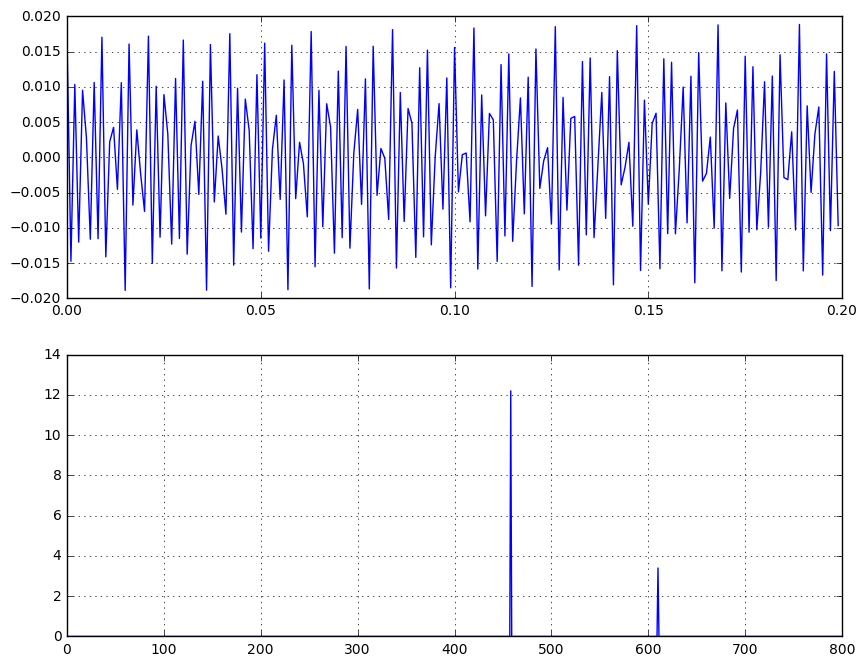

In [17]:
(ti, signal, fi, sigf) = doppled()

fig,ax = plt.subplots(2,1, figsize=(10,8))
stop = len(ti)//5
ax[0].grid()
ax[0].plot(ti[:stop],signal[:stop].real)
ax[1].grid()
ax[1].plot(fi,np.abs(sigf))